Import tensorflow

In [19]:
import tensorflow as tf
print(tf.__version__)

2.12.0


Other imports

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Make the dataset

In [21]:
n = 1000
x = np.random.random((n, 2)) * 6 - 3 # between (-3, +3)
y = np.cos(2*x[:, 0]) + np.cos(3*x[:, 1])

This implements the function:

$y = cos(2x_1)+cos(3x_2)$

Plot it

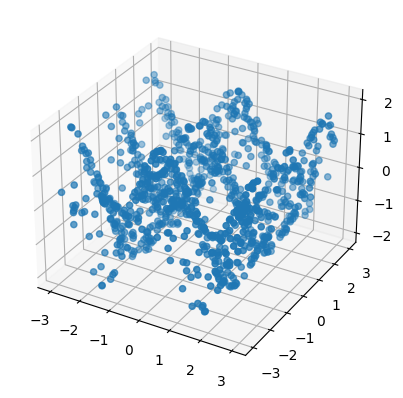

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y);

Build the model

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

Compile and fit

In [24]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0373
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9320
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9324
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9045
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9029
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8625
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8119
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7662
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7023
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6283
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6264
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5708
Epoch 13/100
32/32 [=================

Plot the loss

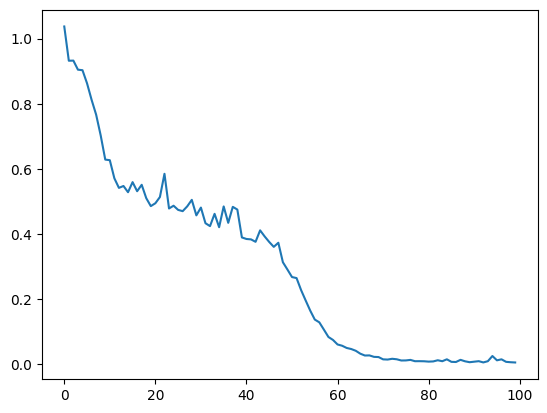

In [25]:
plt.plot(r.history['loss'], label='loss')

Plot the prediction surface

79/79 [==============================] - 0s 2ms/step


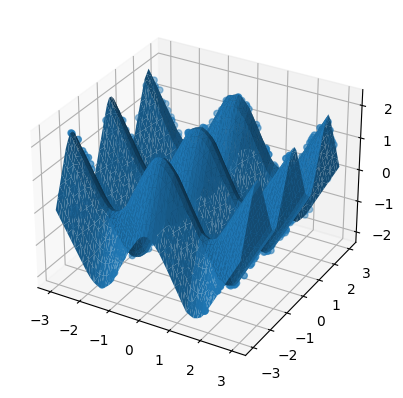

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
x_grid = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(x_grid).flatten()
ax.plot_trisurf(x_grid[:, 0], x_grid[:, 1], y_hat, linewidth=0.2, antialiased=True);
#plt.show()

Can it extrapolate? (-3, +3) -> (-5, +5)

79/79 [==============================] - 0s 4ms/step


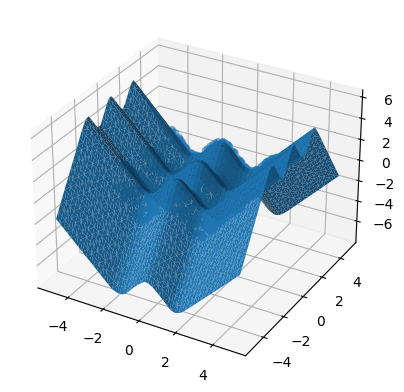

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y)

# Surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
x_grid = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(x_grid).flatten()
ax.plot_trisurf(x_grid[:, 0], x_grid[:, 1], y_hat, linewidth=0.2, antialiased=True);
#plt.show()